In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
import math
import numpy as np

In [4]:
api_key=''
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'

In [5]:
response=requests.get(query)

In [6]:
df = pd.DataFrame(response.json()['historical'])

In [7]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-03,49341.066406,49462.562500,48457.988281,49462.562500,49462.562500,4.080373e+10,4.080373e+10,121.49609,0.246,49127.70443,"September 03, 21",0.00246
1,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,3.950807e+10,3.950807e+10,519.87500,1.065,49441.15495,"September 02, 21",0.01065
2,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710
3,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303
4,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-07,610.572998,614.544983,608.513000,614.544006,614.544006,7.503240e+07,7.503240e+07,3.97101,0.650,612.53400,"September 07, 16",0.00650
1823,2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648
1824,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1825,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df_2 = df[['date', 'adjClose']]

In [10]:
df_2

,date,adjClose
0,2021-09-03,49462.562500
1,2021-09-02,49327.722656
2,2021-09-01,48847.027344
3,2021-08-31,47166.687500
4,2021-08-30,47054.984375
...,...,...
1822,2016-09-07,614.544006
1823,2016-09-06,610.435974
1824,2016-09-05,606.590027
1825,2016-09-04,608.633972


In [11]:
date = pd.to_datetime('2018-09-01')

In [12]:
df3years = df_2[df_2['date']>date]

In [13]:
df3years = df3years.set_index('date')

In [14]:
df3years

,adjClose
date,
2021-09-03,49462.562500
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


In [15]:
y = df3years.adjClose

<AxesSubplot:xlabel='date'>

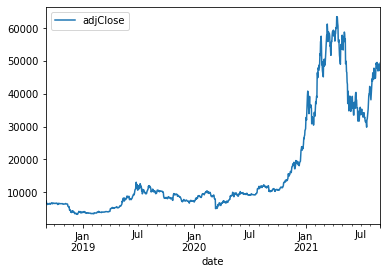

In [16]:
df3years.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# 0 diff
print('p-value: ', adfuller(y)[1])

p-value:  0.2779853847729158


In [19]:
# First diff
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  3.398721292426197e-16


In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

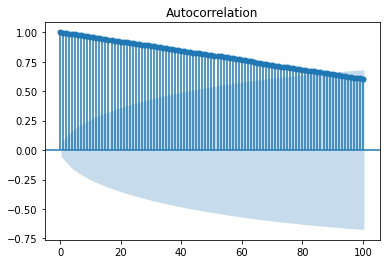

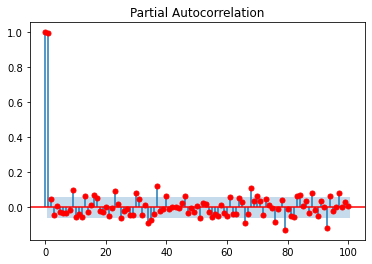

In [22]:
plot_acf(df3years['adjClose'], lags=100);
plot_pacf(df3years['adjClose'], lags=100, c='r');

## Log-differenced data

In [23]:
log_data = np.log(df3years['adjClose'])

In [24]:
log_data_diff = log_data.diff()

In [25]:
log_diffed_data = pd.DataFrame(log_data_diff.drop(df3years.index[0]))

In [26]:
log_diffed_data

,adjClose
date,
2021-09-02,-0.002730
2021-09-01,-0.009793
2021-08-31,-0.035006
2021-08-30,-0.002371
2021-08-29,0.037025
...,...
2018-09-06,0.009557
2018-09-05,0.039588
2018-09-04,0.080418


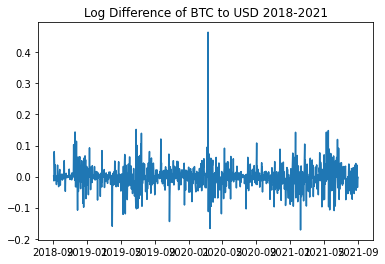

In [27]:
plt.plot(log_diffed_data)
plt.title("Log Difference of BTC to USD 2018-2021")
plt.show()

In [28]:
ad_fuller_result = adfuller(log_diffed_data['adjClose'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -15.314575315102754
p-value: 4.142446187366805e-28


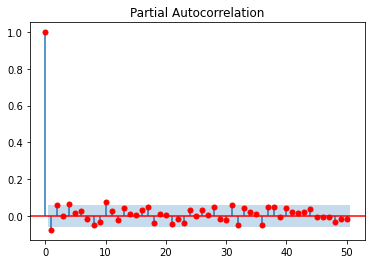

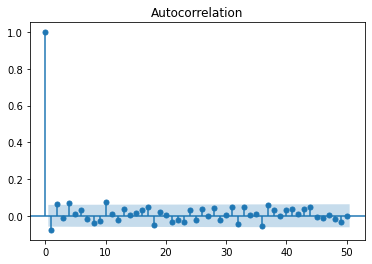

In [29]:
plot_pacf(log_diffed_data['adjClose'], lags=50, c='r');
plot_acf(log_diffed_data['adjClose'], lags=50);

## Differencing 

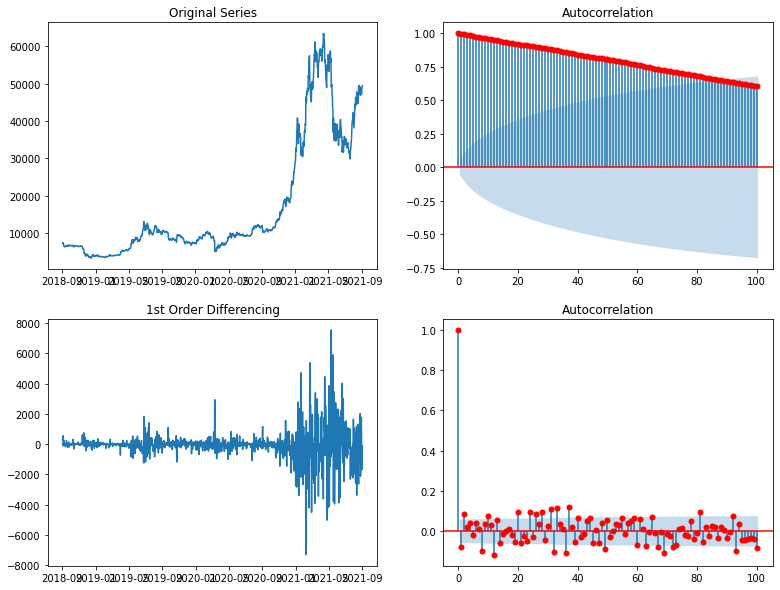

In [31]:
# Original Series
fig, axes = plt.subplots(2, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, lags=100, ax=axes[0, 1], c='r')

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), lags=100, ax=axes[1, 1], c='r')

plt.show()

In [32]:
y_diff = y.diff().dropna()

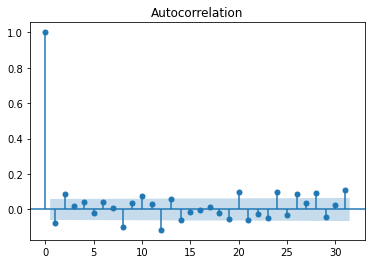

In [33]:
plot_acf(y_diff);

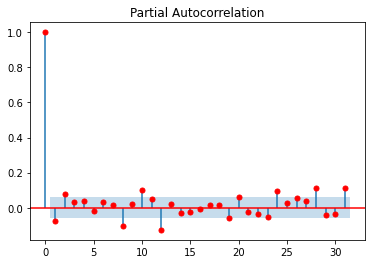

In [34]:
plot_pacf(y_diff, c='r');

## Train/Test split

In [35]:
train = df3years[220:]
train

,adjClose
date,
2021-01-26,32569.849609
2021-01-25,32366.392578
2021-01-24,32289.378906
2021-01-23,32067.642578
2021-01-22,33005.761719
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


In [36]:
test = df3years[:220]
test

,adjClose
date,
2021-09-03,49462.562500
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
...,...
2021-01-31,33114.359375
2021-01-30,34269.523438
2021-01-29,34316.386719


## ARIMA ON DF

In [37]:
from statsmodels.tsa.arima_model import ARIMA
# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 1))

# 2. fit the models
arima = arima.fit()

arima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28548D+00    |proj g|=  5.96856D-05

At iterate    5    f=  8.28548D+00    |proj g|=  2.02505D-05

At iterate   10    f=  8.28548D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.776D-07   8.285D+00
  F =   8.2854797187341322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                 1097
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9089.171
Method:                       css-mle   S.D. of innovations            959.618
Date:                Fri, 03 Sep 2021   AIC                          18186.343
Time:                        16:27:09   BIC                          18206.344
Sample:                             1   HQIC                         18193.910
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -38.4591     27.489     -1.399      0.162     -92.337      15.418
ar.L1.D.adjClose    -0.5841      0.173     -3.375      0.001      -0.923      -0.245
ma.L1.D.adjClose     0.5029      0.184      2.738      0.006       0.143       0.863
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7120           +0.0000j            1.7120            0.5000
MA.1           -1.9883           +0.0000j            1.9883            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA ON TRAIN DF

In [50]:
arima_train = ARIMA(train, order=(1, 1, 1))

# 2. fit the models
arima_train = arima_train.fit()

arima_train.summary()

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.57355D+00    |proj g|=  6.90115D-05

At iterate    5    f=  7.57355D+00    |proj g|=  6.90115D-05

At iterate   10    f=  7.57355D+00    |proj g|=  1.06581D-06

At iterate   15    f=  7.57355D+00    |proj g|=  9.59233D-06

At iterate   20    f=  7.57355D+00    |proj g|=  4.25437D-05

At iterate   25    f=  7.57355D+00    |proj g|=  2.04281D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     48      1     0     0   

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                  877
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6642.003
Method:                       css-mle   S.D. of innovations            470.882
Date:                Fri, 03 Sep 2021   AIC                          13292.005
Time:                        16:29:38   BIC                          13311.111
Sample:                             1   HQIC                         13299.313
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -28.8650     16.974     -1.701      0.089     -62.134       4.404
ar.L1.D.adjClose    -0.0481      0.280     -0.172      0.864      -0.597       0.501
ma.L1.D.adjClose     0.1190      0.277      0.429      0.668      -0.424       0.662
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -20.7929           +0.0000j           20.7929            0.5000
MA.1           -8.4069           +0.0000j            8.4069            0.5000
-----------------------------------------------------------------------------
"""

In [51]:
df3years[1:2]['adjClose']

date
2021-09-02    49327.722656
Name: adjClose, dtype: float64

In [52]:
absolute_next_day_prediction = arima.predict()[0] + df3years[1:2]['adjClose']
absolute_next_day_prediction

date
2021-09-02    49289.263508
Name: adjClose, dtype: float64

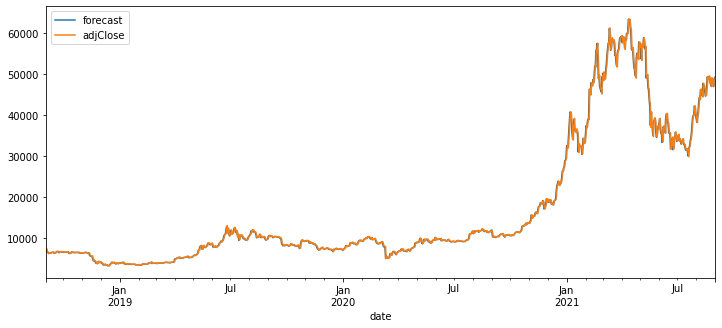

In [53]:
arima.plot_predict(end='2018-09-02', start='2021-09-01', dynamic=False);
fig = plt.gcf(); fig.set_size_inches(12, 5);

In [91]:
df_predict = pd.DataFrame(arima.predict())
merged_df = df_predict.merge(df3years, on='date')
merged_df['Predicted_price'] = merged_df['adjClose'] + merged_df[0]
merged_df

,0,adjClose,Predicted_price
date,,,
2021-09-02,-38.459148,49327.722656,49289.263508
2021-09-01,-30.154162,48847.027344,48816.873182
2021-08-31,-6.166061,47166.687500,47160.521439
2021-08-30,79.130075,47054.984375,47134.114450
2021-08-29,-91.637362,48829.832031,48738.194669
...,...,...,...
2018-09-06,-62.749588,6529.169922,6466.420334
2018-09-05,-34.406644,6792.830078,6758.423434
2018-09-04,-65.025326,7361.660156,7296.634830


In [109]:
y_pred = merged_df['Predicted_price'][:219]
y_pred

date
2021-09-02    49289.263508
2021-09-01    48816.873182
2021-08-31    47160.521439
2021-08-30    47134.114450
2021-08-29    48738.194669
                  ...     
2021-01-31    33145.283171
2021-01-30    34227.373677
2021-01-29    34182.877567
2021-01-28    31652.023455
2021-01-27    30586.913505
Name: Predicted_price, Length: 219, dtype: float64

In [111]:
y_test = merged_df['adjClose'][:219]
y_test

date
2021-09-02    49327.722656
2021-09-01    48847.027344
2021-08-31    47166.687500
2021-08-30    47054.984375
2021-08-29    48829.832031
                  ...     
2021-01-31    33114.359375
2021-01-30    34269.523438
2021-01-29    34316.386719
2021-01-28    31649.605469
2021-01-27    30432.546875
Name: adjClose, Length: 219, dtype: float64

In [112]:
y_true = test[1:]
y_true

,adjClose
date,
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
2021-08-29,48829.832031
...,...
2021-01-31,33114.359375
2021-01-30,34269.523438
2021-01-29,34316.386719


In [114]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print('MSE =', round(mse, 2))
print('MAE =', round(mae, 2))
print('MAPE =', mape)

MSE = 39798.06
MAE = 152.35
MAPE = 0.0033800038357821895


In [54]:
(forecast, stderr, conf_int) = arima.forecast(len(test), alpha=0.05)

In [55]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

In [56]:
conf_int[0:5]

,low,high
0,5337.624783,9099.257594
1,4635.036624,9743.408986
2,4010.641873,10280.089944
3,3512.494993,10707.624433
4,3048.960838,11090.556865


In [57]:
forecast[:5]

0    7218.441188
1    7189.222805
2    7145.365909
3    7110.059713
4    7069.758852
Name: forecast, dtype: float64

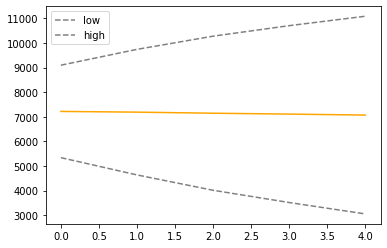

In [58]:
plt.plot(forecast[:5], c='orange')
plt.plot(conf_int['low'][0:5], label='low', c='grey', ls='--')
plt.plot(conf_int['high'][0:5], label='high', c='grey', ls='--')
plt.legend()

In [59]:
forecast.index = test['adjClose'].index
conf_int.index = test['adjClose'].index

<AxesSubplot:title={'center':'Residuals'}, xlabel='date'>

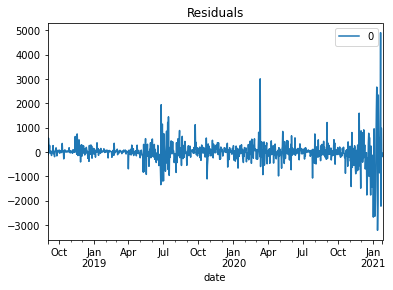

In [60]:
residuals = pd.DataFrame(arima_train.resid)
residuals.plot(title="Residuals")

<AxesSubplot:title={'center':'Residual density'}, ylabel='Density'>

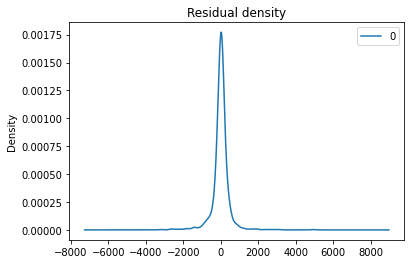

In [61]:
residuals.plot(kind='kde', title='Residual density')